## 資料前處理

In [1]:
import keras

Using TensorFlow backend.


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [8]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## 使用Functional API、會分岔的神經網路

In [9]:
from keras.models import Model

In [10]:
from keras.layers import Input

#### 使用跟上星期做得最好的神經網路相似的層數與個數(激活函數relu、損失函數crossentropy、優化器SGD)

#### 但中間將隱藏層分岔，而不是全為線性堆疊

In [11]:
f_1 = Dense(100, activation='relu')
f_2 = Dense(500, activation='relu')
f_3 = Dense(250, activation='relu')
f_4 = Dense(10, activation='softmax')

In [12]:
x = Input(shape=(784, )) #？代表batch_size
x

<tf.Tensor 'input_1:0' shape=(?, 784) dtype=float32>

In [13]:
#架構神經網路
from keras.layers import concatenate,add

h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_1)

u=concatenate([h_2,h_3])
y=f_4(u)

In [14]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          50500       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 250)          25250       dense_1[0][0]                    
__________________________________________________________________________________________________
concatenat

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.0005), metrics=['acc'])

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Model3.png', show_shapes=True, show_layer_names=True)

![模型](Model3.png)

In [17]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

In [18]:
model_h = model.fit(x_train, y_train, batch_size=100, epochs=50, validation_split=0.1, callbacks=[early_stopping])

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 28us/step - loss: 5.3982 - acc: 0.6323 - val_loss: 2.6420 - val_acc: 0.8152
Epoch 2/50
54000/54000 [==============================] - 1s 26us/step - loss: 2.8101 - acc: 0.8032 - val_loss: 2.4401 - val_acc: 0.8275
Epoch 3/50
54000/54000 [==============================] - 1s 26us/step - loss: 2.5233 - acc: 0.8247 - val_loss: 2.2087 - val_acc: 0.8487
Epoch 4/50
54000/54000 [==============================] - 1s 25us/step - loss: 1.6913 - acc: 0.8746 - val_loss: 0.7313 - val_acc: 0.9365
Epoch 5/50
54000/54000 [==============================] - 1s 26us/step - loss: 0.8209 - acc: 0.9296 - val_loss: 0.8115 - val_acc: 0.9305
Epoch 6/50
54000/54000 [==============================] - 1s 26us/step - loss: 0.6886 - acc: 0.9405 - val_loss: 0.6470 - val_acc: 0.9453
Epoch 7/50
54000/54000 [==============================] - 1s 25us/step - loss: 0.6079 - acc: 0.9474 - val_loss: 0.5918 - val_acc:

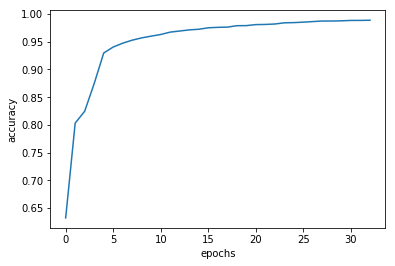

In [19]:
plt.plot(model_h.history['acc'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

## training data的訓練成果

In [20]:
from sklearn import metrics 
from sklearn.metrics import classification_report

print("Train data：")
print(classification_report(y_train.argmax(1), model.predict(x_train).argmax(1)))
metrics.accuracy_score(y_train.argmax(1), model.predict(x_train).argmax(1))

Train data：
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      5923
          1       0.99      0.99      0.99      6742
          2       0.98      0.99      0.98      5958
          3       0.98      0.98      0.98      6131
          4       0.99      0.98      0.99      5842
          5       0.99      0.98      0.98      5421
          6       0.99      0.99      0.99      5918
          7       0.98      0.99      0.99      6265
          8       0.98      0.98      0.98      5851
          9       0.98      0.98      0.98      5949

avg / total       0.99      0.99      0.99     60000



0.98595

## 預測testing data的成果

In [21]:
print("Test data：")
print(classification_report(y_test.argmax(1), model.predict(x_test).argmax(1)))
metrics.accuracy_score(y_test.argmax(1), model.predict(x_test).argmax(1))

Test data：
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       980
          1       0.98      0.98      0.98      1135
          2       0.95      0.95      0.95      1032
          3       0.94      0.96      0.95      1010
          4       0.96      0.94      0.95       982
          5       0.95      0.94      0.94       892
          6       0.96      0.96      0.96       958
          7       0.94      0.96      0.95      1028
          8       0.95      0.95      0.95       974
          9       0.95      0.93      0.94      1009

avg / total       0.96      0.96      0.96     10000



0.9554